**For our inaugural competition, we're working with Save All The Pets, a philanthropic organization in the US with the endgame of moving shelter animals to shelters where they'll be more likely to be adopted.**

We know that certain dog breeds are more likely to be adopted versus killed in different animal shelters, and those dogs can be moved to other shelters. However, not all shelter dog breeds are known, so they can't as easily be saved.

The goal of this challenge is to predict a dog's breed given an image of it - you can also use optional features like color, sex, age, and size. You will be given a clean CSV of around 83,000 dog images with breed labels, and some other columns.

After you've trained your model, you'll test it on the images of dogs with unknown breeds, and upload your answers as a CSV.

Let's save some dogs!

## module1: importing necessary libraries


In [0]:
#download the data
!wget https://storage.googleapis.com/prod-dsn-datasets/Dog_Breed_Recognition_Competition_Datasets.zip


--2019-09-21 12:11:06--  https://storage.googleapis.com/prod-dsn-datasets/Dog_Breed_Recognition_Competition_Datasets.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2522469840 (2.3G) [application/zip]
Saving to: ‘Dog_Breed_Recognition_Competition_Datasets.zip’

Dog_Breed_Recogniti 100%[===================>]   2.35G  62.5MB/s    in 31s     

2019-09-21 12:11:38 (76.4 MB/s) - ‘Dog_Breed_Recognition_Competition_Datasets.zip’ saved [2522469840/2522469840]



In [0]:
mkdir dbr_dataset

In [0]:
#creating dataset at /content/dbr_dataset
!unzip Dog_Breed_Recognition_Competition_Datasets.zip -d /content/dbr_dataset

Archive:  Dog_Breed_Recognition_Competition_Datasets.zip
   creating: /content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/
  inflating: /content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_Training_Images.zip  
   creating: /content/dbr_dataset/__MACOSX/
   creating: /content/dbr_dataset/__MACOSX/Dog_Breed_Recognition_Competition_Datasets/
  inflating: /content/dbr_dataset/__MACOSX/Dog_Breed_Recognition_Competition_Datasets/._Dog_Breed_Training_Images.zip  
  inflating: /content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_Test_Images.zip  
  inflating: /content/dbr_dataset/__MACOSX/Dog_Breed_Recognition_Competition_Datasets/._Dog_Breed_Test_Images.zip  
  inflating: /content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_testdata_sorted.csv  
  inflating: /content/dbr_dataset/__MACOSX/Dog_Breed_Recognition_Competition_Datasets/._Dog_Breed_testdata_sorted.csv  
  inflating: /content/dbr_dataset/Dog_Breed_Recognition

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # li
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import PIL
from PIL import Image
import sys

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_testdata_sorted.csv
/content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_Test_Images.zip
/content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_id_mapping.csv
/content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_trainingdata.csv
/content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_Training_Images.zip


# module2: data cleaning and data manipulation

In [0]:
mkdir training_images


In [0]:
!unzip /content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_Training_Images.zip -d training_images

Archive:  /content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_Training_Images.zip
warning [/content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_Training_Images.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [/content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_Training_Images.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
  inflating: training_images/10004890.jpg  
  inflating: training_images/10043260.jpg  
  inflating: training_images/10053174.jpg  
  inflating: training_images/10089622.jpg  
  inflating: training_images/1009833.jpg  
  inflating: training_images/10107490.jpg  
  inflating: training_images/10115088.jpg  
  inflating: training_images/10115144.jpg  
  inflating: training_images/10115286.jpg  
  inflating: training_images/10116183.jpg  
  inflating: training_images/101

In [0]:
mkdir test_images

In [0]:
!unzip /content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_Test_Images.zip -d test_images

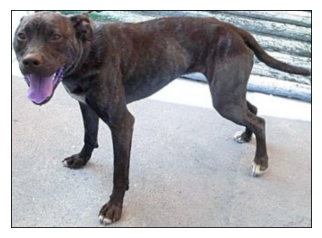

In [0]:
import json
# ###for displaying images
import cv2
import pandas as pd
import  matplotlib.pyplot as plt
img = cv2.imread('/content/training_images/10004890.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

train = pd.read_csv("/content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_trainingdata.csv")
testsorted = pd.read_csv("/content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_testdata_sorted.csv")
id_mapping = pd.read_csv("/content/dbr_dataset/Dog_Breed_Recognition_Competition_Datasets/Dog_Breed_id_mapping.csv")


### No need of executions

In [0]:
#train.dtypes
#to change its data types data['Item Code'].astype(str)
#train.iloc[:, [0,1]].head() #the other way

### Step1: making an extra column pet_id_images by adding '.jpg' to pet_id column of train and saving dataframe as "df1"

In [0]:
#adding .png an the end
train['pet_id_images'] = train['pet_id'].astype(str) + '.jpg'

In [0]:
df1 = train[['pet_id','pet_id_images','breed']]
df1.head()

pet_id pet_id_images                      breed
0  21425781  21425781.jpg         Labrador Retriever
1  25425678  25425678.jpg            Black Mouth Cur
2  21571324  21571324.jpg         Labrador Retriever
3  25526487  25526487.jpg          Doberman Pinscher
4  25946457  25946457.jpg  American Pit Bull Terrier

In [0]:
df1.shape

(65499, 3)

In [0]:
#df1 = df1.sort_values(by = ['pet_id'])
#df1.head()



### Step2: merging id_mapping , df1 and saving dataframe as "df2"

In [0]:
df2 = pd.merge(df1[['pet_id','breed','pet_id_images']],
                 id_mapping[['breed', 'breed_id']],
                 on='breed')
df2.head()

pet_id               breed pet_id_images  breed_id
0  21425781  Labrador Retriever  21425781.jpg       123
1  21571324  Labrador Retriever  21571324.jpg       123
2  22589814  Labrador Retriever  22589814.jpg       123
3  25264499  Labrador Retriever  25264499.jpg       123
4  25016455  Labrador Retriever  25016455.jpg       123

In [0]:
labels = df2[['pet_id','breed_id']]
labels.head()

pet_id  breed_id
0  21425781       123
1  21571324       123
2  22589814       123
3  25264499       123
4  25016455       123

# module3: data analytics



### *for loading, resizing all train images into "image list" and all classes into "class list"*

In [0]:
#leave man
from tqdm import tqdm

import numpy as np # li
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import PIL
from PIL import Image
import sys


# I have also set an im_width variable which sets the size for the image to be re-sized to, 128x128 px
img_size = 224
#dim = (128,128)
images = []
classes = []
# load training images
for f, breed in tqdm(labels.values):
    try:
        img = Image.open('/content/training_images/{}.jpg'.format(f))
    except FileNotFoundError and OSError:
        pass
    
    classes.append(breed)
    img = img.resize((int(img_size),int(img_size)),Image.ANTIALIAS)
    images.append(img)
    


100%|██████████| 65458/65458 [05:24<00:00, 201.97it/s]


In [0]:
#images

In [0]:
#print(os.listdir("/kaggle/working/training_images"))

## for displaying images

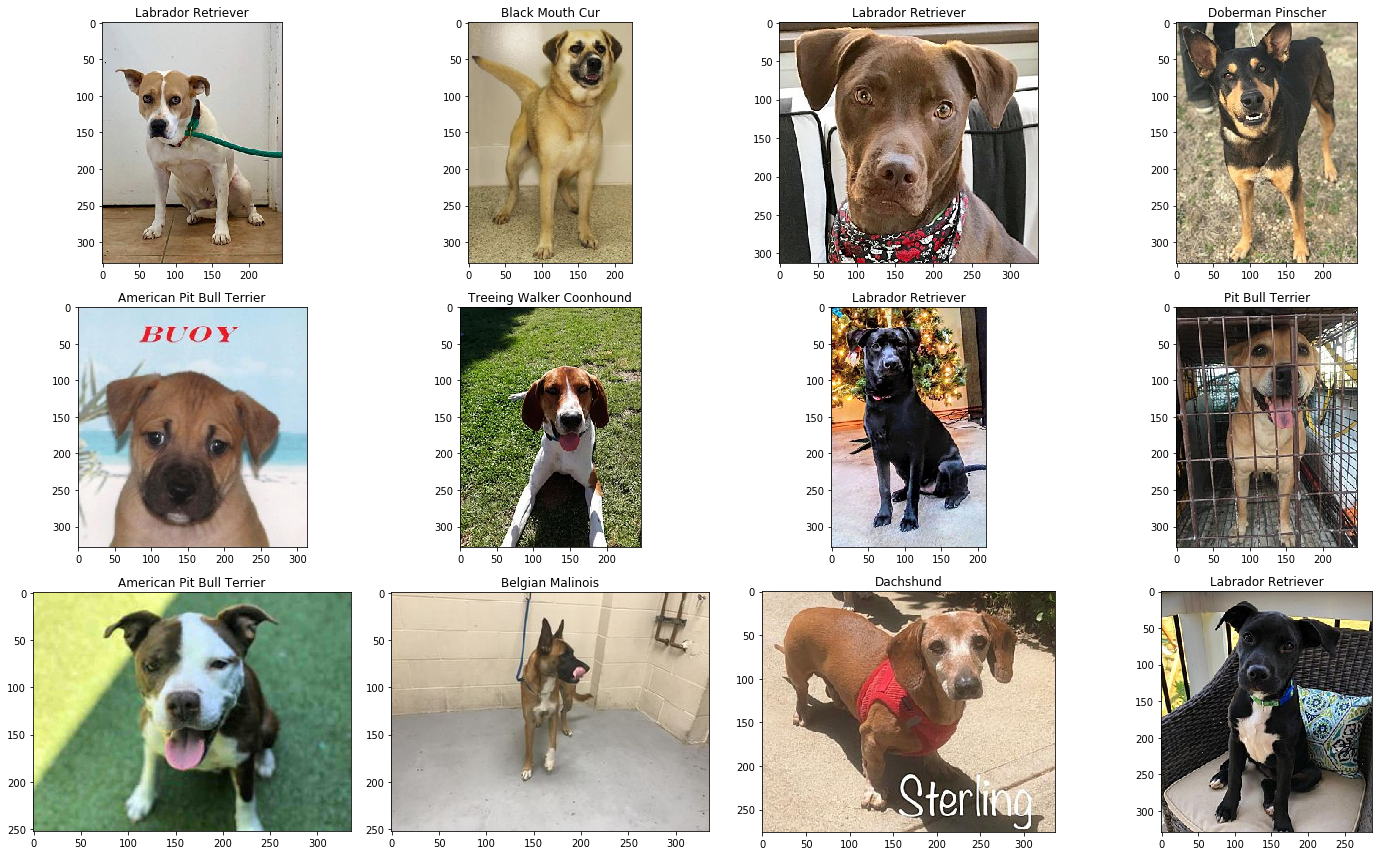

In [0]:



def display_samples(df, columns=4, rows=3):
    fig=plt.figure(figsize=(5*columns, 4*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'pet_id']
        image_id = df.loc[i,'breed']
        img = cv2.imread(f'/content/training_images/{image_path}.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
        #plt.imshow(image2np(img.data))
    
    plt.tight_layout()

display_samples(df1)

# pickel approach 

## aptos approach

## resizing + converting into numpy array

In [0]:
def get_pad_width(im, new_shape, is_rgb=True):
    pad_diff = new_shape - im.shape[0], new_shape - im.shape[1]
    t, b = math.floor(pad_diff[0]/2), math.ceil(pad_diff[0]/2)
    l, r = math.floor(pad_diff[1]/2), math.ceil(pad_diff[1]/2)
    if is_rgb:
        pad_width = ((t,b), (l,r), (0, 0))
    else:
        pad_width = ((t,b), (l,r))
    return pad_width

def preprocess_image(image_path, desired_size=224):
    im = Image.open(image_path)
    im = im.resize((desired_size, )*2, resample=Image.LANCZOS)
    
    return im


In [0]:
train.shape

(65499, 17)

In [0]:
train.shape[0]-1

65498

In [0]:
train['pet_id'].shape[0]-1

65498

# leave man!

In [0]:
N = train.shape[0]-1
x_train = np.empty((N, 224, 224, 3), dtype=np.uint8)

for i, image_id in enumerate(tqdm(train['pet_id'])):
    x_train[i, :, :, :] = preprocess_image(f'/content/training_images/{image_id}.jpg'
)

  0%|          | 44/65499 [00:00<04:55, 221.38it/s]


ValueError: ignored

In [0]:
N = train_df.shape[0]
x_train = np.empty((N, 224, 224, 3), dtype=np.uint8)

for i, image_id in enumerate(tqdm(testsorted['pet_id'])):
    x_train[i, :, :, :] = preprocess_image(
        f'/content/test_images/{image_id}.jpg'
    )

In [0]:
y_train = pd.get_dummies(train['pet_id']).values

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

NameError: ignored

# reduce the breed to 200

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218]


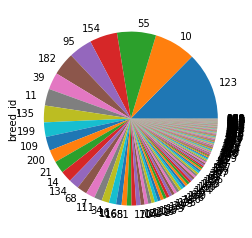

In [0]:
labels.to_csv('labels.csv')
#df.to_csv('file2.csv', header=False, index=False) 

from sklearn.model_selection import train_test_split
# reduce size to 20
num_breeds = 200
top_breeds = sorted(list(labels['breed_id'].value_counts().head(num_breeds).index))
sub_train_top_breeds = labels[labels['breed_id'].isin(top_breeds)]
# plot
sub_train_top_breeds.breed_id.value_counts().plot(kind='pie')
print(top_breeds)

In [0]:
sub_train_top_breeds['breed_id'].head()

0    123
1    123
2    123
3    123
4    123
Name: breed_id, dtype: int64

In [0]:
# we do one hot encoding to lableing the data
targets_series = pd.Series(sub_train_top_breeds['breed_id'])
one_hot = pd.get_dummies(targets_series, sparse = True)
one_hot_labels = np.asarray(one_hot)
print(one_hot_labels[51007])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
sub_train_top_breeds.values

array([[21425781,      123],
       [21571324,      123],
       [22589814,      123],
       ...,
       [25921985,      156],
       [25503178,      156],
       [25298362,      156]])

In [0]:
from tqdm import tqdm

import numpy as np # li
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import PIL
from PIL import Image
import sys


# I have also set an im_width variable which sets the size for the image to be re-sized to, 128x128 px
img_size = 224
#dim = (128,128)
images = []
classes = []
# I have also set an im_size variable which sets the size for the image to be re-sized to, 128*128 px
im_size = 164
x_train = []
y_train = []

# loading the training data of all the images in the 20 breeds, using a for loop through the values of the csv files.
i = 0
for f, breed in tqdm(sub_train_top_breeds.values):
    img = cv2.imread('/content/training_images/{}.jpg'.format(f))
    label = one_hot_labels[i]
    img = img.resize(224,224,Image.ANTIALIAS)
    images.append(img)
    #img = img.resize((int(img_size),int(img_size)),Image.ANTIALIAS)
    #images.append(img)
    
    try:
        x_train.append(images)
    except AttributeError:
           print("1")
    y_train.append(label)
    i += 1
# we do the normolize for the image data in order to make it easier for neural networks to learn 
x_train_raw = np.array(x_train, np.float32) / 255.
y_train_raw = np.array(y_train, np.uint8)
# check the shape of the ouputs to make sure everything went as expected
print(x_train_raw.shape)
print(y_train_raw.shape)


  0%|          | 0/65446 [00:00<?, ?it/s]


AttributeError: ignored

In [0]:
print(x_train_raw.shape)

In [0]:
print(y_train_raw.shape)


## try splits

In [0]:
# split data into test and train
#x_train,x_test,y_train,y_test = train_test_split(x_train_raw, y_train_raw, test_size=0.3, random_state=1)

In [0]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train_multi, 
    test_size=0.15, 
    random_state=2019
)

# module4: modelling


#### densenet-121

In [0]:
densenet = DenseNet121(
    weights='../input/densenet-keras/DenseNet-BC-121-32-no-top.h5',
    include_top=False,
    input_shape=(224,224,3)
)


In [0]:
def build_model():
    model = Sequential()
    model.add(densenet)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(5, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=0.00005),
        metrics=['accuracy']
    )
    
    return model

In [0]:
model = build_model()
model.summary()

# module5: Training and evaluation

In [0]:
kappa_metrics = Metrics()

history = model.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=15,
    validation_data=(x_val, y_val),
    callbacks=[kappa_metrics]
)

In [0]:
with open('history.json', 'w') as f:
    json.dump(history.history, f)

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['acc', 'val_acc']].plot()


# module6: predictions on test data

In [0]:
model.load_weights('model.h5')
y_val_pred = model.predict(x_val)

# module7: submission sorted by testsorted

##### All submissions must be made in .csv format, and submissions in other formats will not be accepted.

### Please ensure your syntax and formatting is correct, as this will affect how our judging algorithm is able to process your submission. Examples are extra lines, rows, columns, etc.

## Final submission will have each line containing the: breed_id sorted by pet_id. For example, the first being pet_id = 370923 with the breed_id = 89, the second being pet_id 555110 with breed_id 24, and so on. The file you upload will look something like this:

# 89
# 24

In [0]:
y_test = model.predict(x_test) > 0.5
y_test = y_test.astype(int).sum(axis=1) - 1

test_df['diagnosis'] = y_test
test_df.to_csv('submission.csv',index=False)

# no use after this

### just using to display the no . of images and plotting them

In [0]:


    
# Helper-function for plotting images
def plot_images(images, classes):
    assert len(images) == len(classes) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3,figsize=(60,60),sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
   
    for i, ax in enumerate(axes.flat):
        # Plot image.
        #import  matplotlib.pyplot as plt
        #img = cv2.imread('/kaggle/working/training_images/10004890.jpg')
        #plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
        #plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        #plt.show()
        #check this out
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB).reshape(img_width,img_height,3), cmap='hsv')    
        xlabel = "Breed: {0}".format(classes[i])
    
        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        ax.xaxis.label.set_size(60)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    
    plt.show()

In [0]:
# plot some example images
# select random images
from random import randint
random_numbers = [randint(0, len(images)) for p in range(0,9)]
images_to_show = [images[i] for i in random_numbers]
classes_to_show = [classes[i] for i in random_numbers]
print("Images to show: {0}".format(len(images_to_show)))
print("Classes to show: {0}".format(len(classes_to_show)))
# plot the images
#plot_images(images_to_show, classes_to_show)
